In [1]:
import os
import sys
import pprint as pp
import numpy as np
import matplotlib.pyplot as plt

# set the main directory to import qel instruments drivers
sys.path.append(os.getcwd().replace('\\documents\\measure_notebooks',''))
from instruments.Tektronix_AWG5208.TektronixAWG_core import Tektronix_AWG5208
from instruments.Tektronix_AWG5208.TektronixAWG_sequenceEditor import Time_Domain_Sequence
from instruments.Tektronix_AWG5208.plot_tools import *

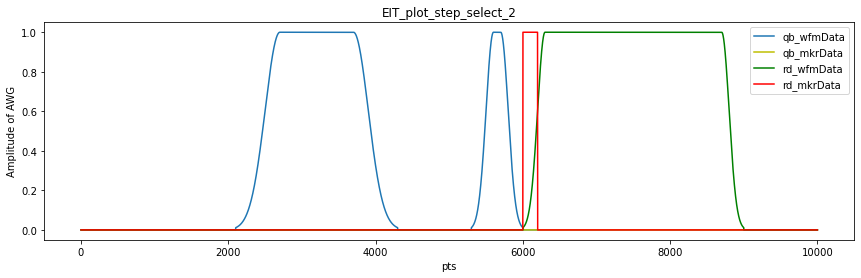

In [2]:
eit_seq_obj = Time_Domain_Sequence()
wfm_amount = 2
wfm_totlen = 10000
gauss_sig = 100

qubitDrive_delay_time_delta = 1000
qubitDrive_gauss_sig_front = 200
qubitDrive_gauss_flat_front = 1000
qubitDrive_gauss_sig_back = 100
qubitDrive_gauss_flat_back = 100
qubitDrive_mkrDuration = 0
qubitDrive_mkr = 'no_mkr'

readOut_sigma = 100
readOut_offset = 6000
readOut_flat = 2400
readOut_mkrDuration = 200
readOut_mkr = 'mkr1'

store_EIT_seq = {}

store_EIT_seq = eit_seq_obj.gen_EIT_seq(wfm_amount,
                                        wfm_totlen,
                                        qubitDrive_delay_time_delta,
                                        qubitDrive_gauss_sig_front,
                                        qubitDrive_gauss_sig_back,
                                        qubitDrive_gauss_flat_front,
                                        qubitDrive_gauss_flat_back,
                                        qubitDrive_mkrDuration,
                                        qubitDrive_mkr,
                                        readOut_sigma,
                                        readOut_offset,
                                        readOut_flat,
                                        readOut_mkrDuration,
                                        readOut_mkr)

# pp.pprint(store_EIT_seq)

# plot the pulse shaping in the specified stepv
seq_name = 'EIT'
step_select = 2
store_time_domain_seq = store_EIT_seq
plt_qb_rd(seq_name, step_select, store_time_domain_seq)

In [3]:
inst_name = 'Tektronix_AWG5208'
inst_address = 'TCPIP0::192.168.20.43::inst0::INSTR'
timeout = 10
Clean_Option = True
sample_rate = 1E9
ref_ext = 10E6

# initialize AWG settings
awgClient = Tektronix_AWG5208(inst_name, inst_address, timeout)
awgClient.connect()
if Clean_Option:awgClient.del_wlist();awgClient.del_slist()
awgClient.set_channel_mkr(1,0,0,0,0,0,0,0)
awgClient.set_sample_rate(sample_rate)
awgClient.set_extref_source(ref_ext)

Connect to Tektronix_AWG5208 successfully
Statement: TEKTRONIX,AWG5208,B030598,FV:6.6.0131.0


In [4]:
seq_name = 'EIT_sequence'
track_assign_order = list(store_time_domain_seq.keys())

awgClient.set_sequential_assign_wfm2seqtable(
    seq_name,
    track_assign_order,
    store_time_domain_seq)

The transfer mission is completed.


In [5]:
channel_qb = 1
seq_track_for_qubitDrive = 1
channel_rd = 2
seq_track_for_readOut = 2
awgClient.load_seq_to_channel(channel_qb, seq_name, seq_track_for_qubitDrive)
awgClient.load_seq_to_channel(channel_rd, seq_name, seq_track_for_readOut)

In [6]:
# disconnect the awg
awgClient.disconnect()

Tektronix_AWG5208 has been disconnected by user.
